In [1]:
# Подключаем библотеки

In [2]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Загружаем данные

In [4]:
(X_train, Y_train), (X_test, Y_test) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [5]:
# Просмотр формата отзыва

In [6]:
print(X_train[10])

[1, 785, 189, 438, 47, 110, 142, 7, 6, 7475, 120, 4, 236, 378, 7, 153, 19, 87, 108, 141, 17, 1004, 5, 2, 883, 2, 23, 8, 4, 136, 2, 2, 4, 7475, 43, 1076, 21, 1407, 419, 5, 5202, 120, 91, 682, 189, 2818, 5, 9, 1348, 31, 7, 4, 118, 785, 189, 108, 126, 93, 2, 16, 540, 324, 23, 6, 364, 352, 21, 14, 9, 93, 56, 18, 11, 230, 53, 771, 74, 31, 34, 4, 2834, 7, 4, 22, 5, 14, 11, 471, 9, 2, 34, 4, 321, 487, 5, 116, 15, 6584, 4, 22, 9, 6, 2286, 4, 114, 2679, 23, 107, 293, 1008, 1172, 5, 328, 1236, 4, 1375, 109, 9, 6, 132, 773, 2, 1412, 8, 1172, 18, 7865, 29, 9, 276, 11, 6, 2768, 19, 289, 409, 4, 5341, 2140, 2, 648, 1430, 2, 8914, 5, 27, 3000, 1432, 7130, 103, 6, 346, 137, 11, 4, 2768, 295, 36, 7740, 725, 6, 3208, 273, 11, 4, 1513, 15, 1367, 35, 154, 2, 103, 2, 173, 7, 12, 36, 515, 3547, 94, 2547, 1722, 5, 3547, 36, 203, 30, 502, 8, 361, 12, 8, 989, 143, 4, 1172, 3404, 10, 10, 328, 1236, 9, 6, 55, 221, 2989, 5, 146, 165, 179, 770, 15, 50, 713, 53, 108, 448, 23, 12, 17, 225, 38, 76, 4397, 18, 183, 8, 

In [7]:
Y_train[15]

0

In [8]:
# Посмотрим словарь слов

In [9]:
word_index = imdb.get_word_index()
word_index

1654784/1641221 [==============================] - 0s 0us/step


{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [10]:
# Сделаем реверсивный словарь

In [11]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [12]:
for i in range(1,31):
  print(i, '=', reverse_word_index[i]) # Посмотрим 30 самых популярных слов в отзывах

1 = the
2 = and
3 = a
4 = of
5 = to
6 = is
7 = br
8 = in
9 = it
10 = i
11 = this
12 = that
13 = was
14 = as
15 = for
16 = with
17 = movie
18 = but
19 = film
20 = on
21 = not
22 = you
23 = are
24 = his
25 = have
26 = he
27 = be
28 = one
29 = all
30 = at


In [13]:
# Раскодируем рецензию

In [14]:
decoded_review = ' '.join([reverse_word_index[i] for i in X_train[9]])
decoded_review

"the as on there plot she's iii film that for find that saw better just is along wrong silly awesome or play this you doing was one in own that successful are make and old plot gets unfortunately of on was although except value omar that with her do they gets for that with timing really way that is played character i i what poor set but is along 100 studio on film is missing br received fact to is mercifully br fabulous and them powers is tapes br enjoys indicate good women show to one good played i i was plain film because avoid for of totally it time do period it couple in college in viewers get br of my to of material it yet br out more"

In [15]:
# Проведем веторизацию текста отзыва в формате ONE HOT ENCODING

In [16]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

In [17]:
X_train = vectorize_sequences(X_train)
X_test = vectorize_sequences(X_test)

In [18]:
X_train[19] # посмотрим как теперь выглядит формат отзыва

array([0., 1., 1., ..., 0., 0., 0.])

In [19]:
len(X_train[23])

10000

In [20]:
X_train.shape

(25000, 10000)

Строим нейронную сеть

In [21]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Компилируем модель

In [22]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy']
              )

Обучаем модель

In [23]:
textmodel = model.fit(X_train,
                      Y_train,
                      epochs=20,
                      batch_size=128,
                      validation_split=0.1)

Epoch 1/20
176/176 [==============================] - 3s 12ms/step - loss: 0.3855 - accuracy: 0.8550 - val_loss: 0.2756 - val_accuracy: 0.8940
Epoch 2/20
176/176 [==============================] - 2s 11ms/step - loss: 0.2126 - accuracy: 0.9187 - val_loss: 0.2752 - val_accuracy: 0.8932
Epoch 3/20
176/176 [==============================] - 2s 10ms/step - loss: 0.1683 - accuracy: 0.9378 - val_loss: 0.3040 - val_accuracy: 0.8904
Epoch 4/20
176/176 [==============================] - 2s 10ms/step - loss: 0.1406 - accuracy: 0.9500 - val_loss: 0.3284 - val_accuracy: 0.8880
Epoch 5/20
176/176 [==============================] - 2s 11ms/step - loss: 0.1204 - accuracy: 0.9563 - val_loss: 0.3710 - val_accuracy: 0.8796
Epoch 6/20
176/176 [==============================] - 2s 11ms/step - loss: 0.1037 - accuracy: 0.9636 - val_loss: 0.4011 - val_accuracy: 0.8812
Epoch 7/20
176/176 [==============================] - 2s 11ms/step - loss: 0.0890 - accuracy: 0.9681 - val_loss: 0.4367 - val_accuracy: 0.8816

Визуализируем процесс обучения

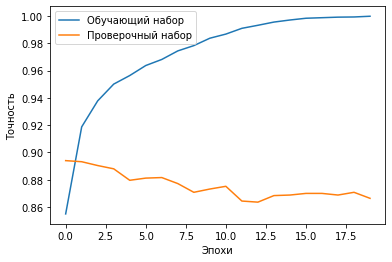

In [24]:
plt.plot(textmodel.history['accuracy'],
         label='Обучающий набор')
plt.plot(textmodel.history['val_accuracy'],
         label='Проверочный набор')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()
plt.show()

Проверим качество нейронной сети на тестовом наборе

In [25]:
finalscore = model.evaluate(X_test, Y_test)

782/782 [==============================] - 2s 2ms/step - loss: 1.8651 - accuracy: 0.8448
